In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.fft import rfft,fft, ifft, fftshift, fftfreq

In [2]:
# Charger les données
data = np.load("Plot/resultats_multi_dt_lin2025-05-14 16:11:22.900820.npz", allow_pickle=True)


In [3]:
print(data)
#print(data['dt_values'])
dt_values = data['dt_values']
#print('dt',type(dt_values))
amplitudes = data['amplitudes']
#l_sup_10_pop = data['l_sup_10_pop'].item()
l10_pop = data['l10_pop'].item()
l11_pop = data['l11_pop'].item()
l3_pop = data['l3_pop'].item()

NpzFile 'Plot/resultats_multi_dt_lin2025-05-14 16:11:22.900820.npz' with keys: dt_values, amplitudes, l0_pop, l1_pop, l2_pop...


NpzFile 'Plot/resultats_multi_dt_lin2025-05-14 16:11:22.900820.npz' with keys: dt_values, amplitudes, l0_pop, l1_pop, l2_pop...
len= 500


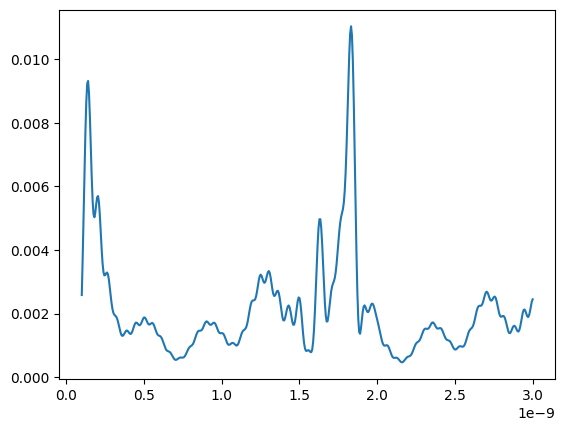

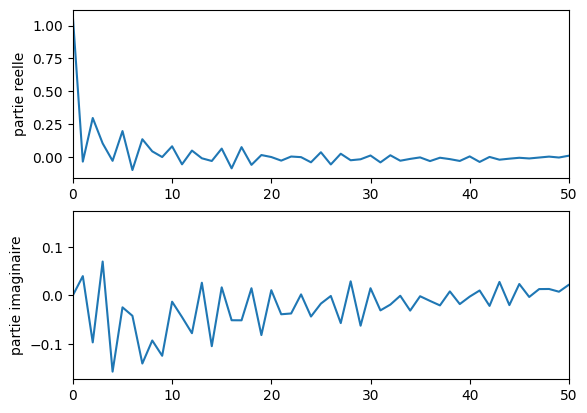

In [15]:
EF_idx = 15
# 2. aller chercher toutes les valeurs à chaque temps pour ce champ electrique
sup = np.zeros(len(dt_values))
pop = np.zeros(len(dt_values))
for i in range(len(dt_values)):
    #sup[i] = l_sup_10_pop[dt_values[i]][EF_idx]
    pop[i] = l10_pop[dt_values[i]][EF_idx]
print(data)
plt.plot(dt_values, pop)
print('len=',len(pop))
# TDF dessus
L_SUP = fft(sup)
POP = fft(pop)

RPOP = rfft(pop)
plt.figure()
plt.subplot(211)
plt.plot(np.real(POP))
plt.ylabel("partie reelle")
plt.xlim(0,50)
plt.subplot(212)
plt.plot(np.imag(POP))
plt.ylabel("partie imaginaire")
plt.xlim(0,50)
plt.show()


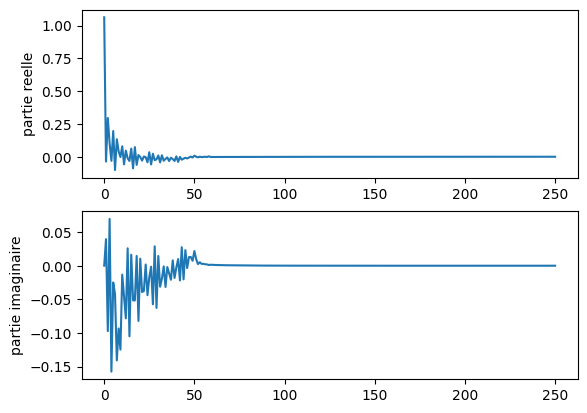

In [5]:
RPOP = rfft(pop)
plt.figure()
plt.subplot(211)
plt.plot(np.real(RPOP))
plt.ylabel("partie reelle")
plt.subplot(212)
plt.plot(np.imag(RPOP))
plt.ylabel("partie imaginaire")

plt.show()

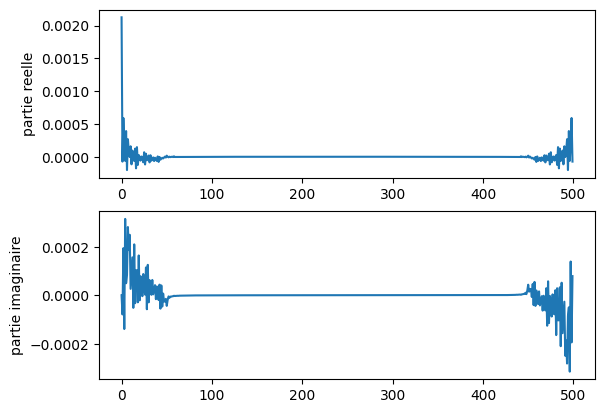

In [6]:
IPOP = ifft(pop)
plt.figure()
plt.subplot(211)
plt.plot(np.real(IPOP))
plt.ylabel("partie reelle")
plt.subplot(212)
plt.plot(np.imag(IPOP))
plt.ylabel("partie imaginaire")
plt.show()

NpzFile 'Plot/resultats_multi_dt_lin2025-05-14 16:11:22.900820.npz' with keys: dt_values, amplitudes, l0_pop, l1_pop, l2_pop...
len= 500
[-2.07587384e+00+2.54268005e-02j -2.38477999e+00+6.77357234e-02j
 -3.21299984e+00+1.72229780e-01j -6.81059446e+00+6.83813491e-01j
  1.05864249e+01+3.15272619e-01j  1.72170302e+00-4.72660005e-01j
  2.14480950e-01-3.54790476e-01j -1.11198091e+00-2.43280369e-01j
 -8.86493861e+00+1.80773249e+00j  4.58019804e+00+9.64414014e-01j
  2.44220438e+00-5.15328691e-01j  1.89294537e+00-8.47176107e-01j
  2.02220765e+00-1.57004760e+00j -7.43715214e+00+1.73620628e+00j
  7.96112881e-02+1.45656919e+00j  1.09260541e+00+3.63617850e-01j
  1.64081100e+00-3.04040073e-01j  3.92461046e+00-2.29471066e+00j
 -4.17145756e+00+3.93099022e-01j -1.73602153e+00+1.05631157e+00j
 -5.26403816e-01+9.72709096e-01j  2.15128230e-01+7.12556247e-01j
  4.10110702e+00-1.69136538e+00j -1.53997896e+00-5.81446841e-01j
 -1.35246943e+00-5.27154728e-02j -1.26904901e+00+6.03205778e-01j
 -1.20380127e+00+1

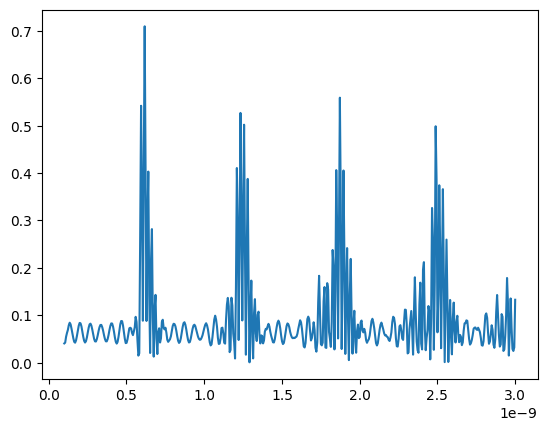

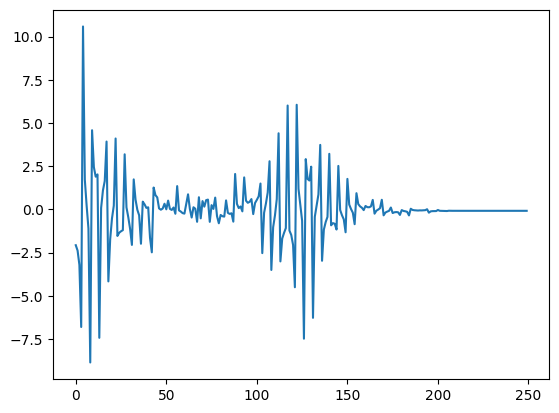

In [87]:
EF_idx = 25
l3_pop = data['l3_pop'].item()
# 2. aller chercher toutes les valeurs à chaque temps pour ce champ electrique
sup = np.zeros(len(dt_values))
pop = np.zeros(len(dt_values))
for i in range(len(dt_values)):
    #sup[i] = l_sup_10_pop[dt_values[i]][EF_idx]
    pop[i] = l3_pop[dt_values[i]][EF_idx]
print(data)
plt.plot(dt_values, pop)
print('len=',len(pop))
# TDF dessus
L_SUP = fft(sup)
POP = rfft(pop)
POP = POP[1:]
print(POP)
print('len=',len(pop)/2)
plt.figure()
plt.plot(POP)
plt.show()


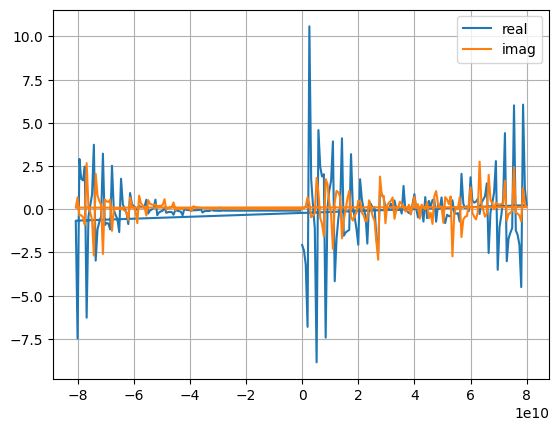

In [90]:
dt_signal = 0.062e-10
n = len(POP)
FREQ_POP = fftfreq(n,dt_signal)
plt.plot(FREQ_POP,POP.real, label = "real")
plt.plot(FREQ_POP,POP.imag, label = "imag")
plt.legend()
plt.grid()
#plt.xlim(-4,4)
plt.show()

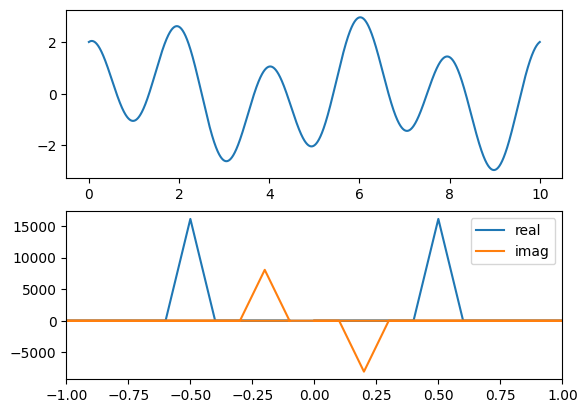

In [10]:
# definition du signal
dt = 0.62e-3
T1 = 2
T2 = 5
t = np.arange(0, T1*T2, dt)
signal = 2*np.cos(2*np.pi/T1*t) + np.sin(2*np.pi/T2*t)

# affichage du signal
plt.subplot(211)
plt.plot(t,signal)

# calcul de la transformee de Fourier et des frequences
fourier = np.fft.fft(signal)
n = signal.size
freq = np.fft.fftfreq(n, d=dt)

# affichage de la transformee de Fourier
plt.subplot(212)
plt.plot(freq, fourier.real, label="real")
plt.plot(freq, fourier.imag, label="imag")
plt.legend()
plt.xlim(-1,1)

plt.show()